In [1]:
import pandas as pd 
import numpy as np 
import clean as cl 
import library_final as lf 
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [115]:
wba= cl.create_fi('JNJ', 'full')

In [116]:
wba.df.tail()

open     high     low   close     volume
date                                                  
2020-01-02  145.87  146.020  145.08  145.97  5776962.0
2020-01-03  143.50  145.373  143.00  144.28  5752392.0
2020-01-06  144.00  144.200  142.85  144.10  7730593.0
2020-01-07  144.01  145.450  141.38  144.98  7385397.0
2020-01-08  144.87  145.980  143.70  144.96  4780068.0

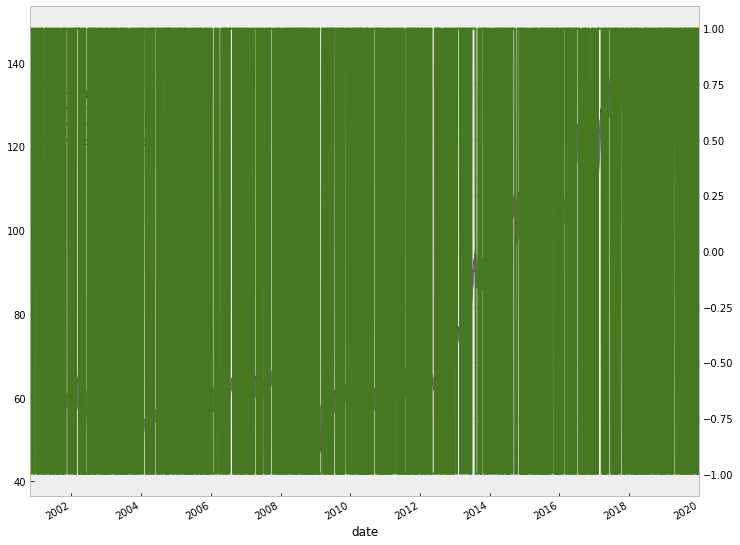

In [117]:
wba_sma_c, wba_ax_c = wba.get_sma(2,6,200, series='close')

In [119]:
wba_sma_c.drop('JNJ', axis=1, inplace=True)
wba_sma_c.head()

sma1_close  sma2_close  positions_close
date                                               
2000-01-06         NaN         NaN               -1
2000-01-07       94.53         NaN               -1
2000-01-10       95.28         NaN               -1
2000-01-11       94.06         NaN               -1
2000-01-12       93.78         NaN               -1

In [120]:
wba_df = wba.df.merge(wba_sma_c, on='date')

In [121]:
wba_df.tail()

open     high     low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  146.020  145.08  145.97  5776962.0     145.920   
2020-01-03  143.50  145.373  143.00  144.28  5752392.0     145.125   
2020-01-06  144.00  144.200  142.85  144.10  7730593.0     144.190   
2020-01-07  144.01  145.450  141.38  144.98  7385397.0     144.540   
2020-01-08  144.87  145.980  143.70  144.96  4780068.0     144.970   

            sma2_close  positions_close  
date                                     
2020-01-02  145.775000                1  
2020-01-03  145.500000               -1  
2020-01-06  145.211667               -1  
2020-01-07  145.083333               -1  
2020-01-08  145.026667               -1

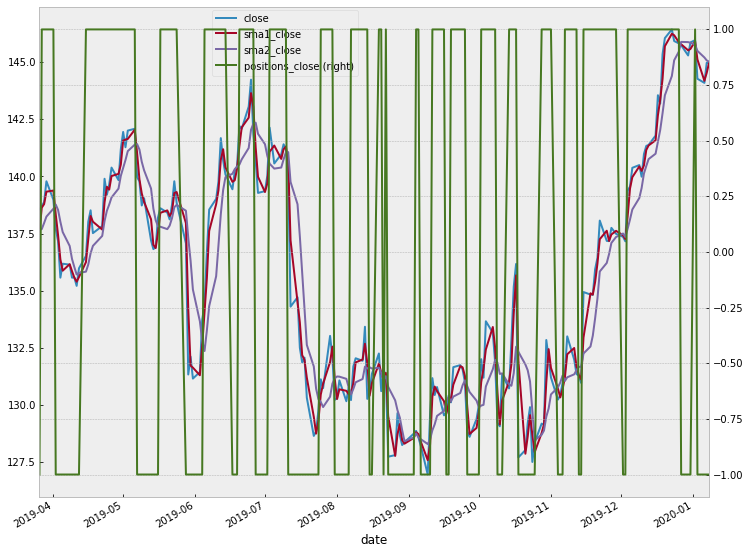

In [122]:
ax = wba_df[['close','sma1_close','sma2_close','positions_close']].iloc[-200:].plot(figsize=(12,10), secondary_y = 'positions_close')
ax.get_legend().set_bbox_to_anchor((0.25,0.85))

In [123]:
adx,_ = cl.get_adx(symbol='WBA')
wba_df = wba_df.merge(adx, on='date')
wba_df.tail()

open     high     low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  146.020  145.08  145.97  5776962.0     145.920   
2020-01-03  143.50  145.373  143.00  144.28  5752392.0     145.125   
2020-01-06  144.00  144.200  142.85  144.10  7730593.0     144.190   
2020-01-07  144.01  145.450  141.38  144.98  7385397.0     144.540   
2020-01-08  144.87  145.980  143.70  144.96  4780068.0     144.970   

            sma2_close  positions_close      ADX  
date                                              
2020-01-02  145.775000                1  12.8410  
2020-01-03  145.500000               -1  12.8039  
2020-01-06  145.211667               -1  12.7866  
2020-01-07  145.083333               -1  12.7697  
2020-01-08  145.026667               -1  12.5606

In [10]:
# wba_df=wba_df.drop(['RSI_x','RSI_y'], axis=1)

In [124]:
rsi,_ = cl.get_rsi(symbol='WBA', series='open')
wba_df = wba_df.merge(rsi, on='date')
wba_df.tail()

open     high     low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  146.020  145.08  145.97  5776962.0     145.920   
2020-01-03  143.50  145.373  143.00  144.28  5752392.0     145.125   
2020-01-06  144.00  144.200  142.85  144.10  7730593.0     144.190   
2020-01-07  144.01  145.450  141.38  144.98  7385397.0     144.540   
2020-01-08  144.87  145.980  143.70  144.96  4780068.0     144.970   

            sma2_close  positions_close      ADX      RSI  
date                                                       
2020-01-02  145.775000                1  12.8410  52.6929  
2020-01-03  145.500000               -1  12.8039  52.6929  
2020-01-06  145.211667               -1  12.7866  53.3836  
2020-01-07  145.083333               -1  12.7697  52.9214  
2020-01-08  145.026667               -1  12.5606  48.0424

In [125]:
macd,_ = cl.get_macd(symbol='WBA', series='close')
macd.sort_index(axis=0, ascending=True, inplace=True)
wba_df = wba_df.merge(macd, on='date')
wba_df.tail()

open     high     low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  146.020  145.08  145.97  5776962.0     145.920   
2020-01-03  143.50  145.373  143.00  144.28  5752392.0     145.125   
2020-01-06  144.00  144.200  142.85  144.10  7730593.0     144.190   
2020-01-07  144.01  145.450  141.38  144.98  7385397.0     144.540   
2020-01-08  144.87  145.980  143.70  144.96  4780068.0     144.970   

            sma2_close  positions_close      ADX      RSI  MACD_Signal  \
date                                                                     
2020-01-02  145.775000                1  12.8410  52.6929      -0.1021   
2020-01-03  145.500000               -1  12.8039  52.6929      -0.0743   
2020-01-06  145.211667               -1  12.7866  53.3836      -0.0390   
2020-01-07  145.083333               -1  12.7697  52.9214      -0.0056   
2020-01-08  145.026667               -1  12.5606  48.0424      -0.0302   

            MACD_Hist    MACD  
date                           
2020-01-02     0.1069  0.0048  
2020-01-03     0.1111  0.0368  
2020-01-06     0.1412  0.1022  
2020-01-07     0.1338  0.1283  
2020-01-08    -0.0985 -0.1287

In [13]:
wba_df.rename(columns={"MACD_Signal_x": "MACD_Signal_o", "MACD_Hist_x":"MACD_Hist_o", 
                        "MACD_x":"MACD_o", "MACD_Signal_y": "MACD_Signal_c",
                        "MACD_Hist_y":"MACD_Hist_c", "MACD_y":"MACD_c"}, inplace=True, errors="raise")

KeyError: "['MACD_Signal_x', 'MACD_Hist_x', 'MACD_x', 'MACD_Signal_y', 'MACD_Hist_y', 'MACD_y'] not found in axis"

In [128]:
wba_df = wba_df.rename(str.lower, axis='columns')
wba_df.tail()

open     high     low   close     volume  sma1_close  \
date                                                                 
2020-01-02  145.87  146.020  145.08  145.97  5776962.0     145.920   
2020-01-03  143.50  145.373  143.00  144.28  5752392.0     145.125   
2020-01-06  144.00  144.200  142.85  144.10  7730593.0     144.190   
2020-01-07  144.01  145.450  141.38  144.98  7385397.0     144.540   
2020-01-08  144.87  145.980  143.70  144.96  4780068.0     144.970   

            sma2_close  positions_close      adx      rsi  macd_signal  \
date                                                                     
2020-01-02  145.775000                1  12.8410  52.6929      -0.1021   
2020-01-03  145.500000               -1  12.8039  52.6929      -0.0743   
2020-01-06  145.211667               -1  12.7866  53.3836      -0.0390   
2020-01-07  145.083333               -1  12.7697  52.9214      -0.0056   
2020-01-08  145.026667               -1  12.5606  48.0424      -0.0302   

            macd_hist    macd         obv  
date                                       
2020-01-02     0.1069  0.0048  37823527.0  
2020-01-03     0.1111  0.0368  37823527.0  
2020-01-06     0.1412  0.1022  43827149.0  
2020-01-07     0.1338  0.1283  39466484.0  
2020-01-08    -0.0985 -0.1287  24101667.0

In [127]:
obv,_ = cl.get_obv('WBA') 
wba_df = wba_df.merge(obv, on='date')
wba_df.head()

open    high    low   close     volume  sma1_close  sma2_close  \
date                                                                           
2000-06-27   95.31   98.19  95.25   97.94  7392000.0       96.72   91.698333   
2000-06-28   97.00   98.31  96.81   98.08  4391600.0       98.01   93.285000   
2000-06-29   98.00   99.38  97.31   98.56  4303700.0       98.32   94.731667   
2000-06-30   98.00  102.00  96.44  101.90  8043300.0      100.23   96.955000   
2000-07-03  101.30  101.30  99.94  101.10  2385100.0      101.50   98.846667   

            positions_close     adx      rsi  macd_signal  macd_hist    macd  \
date                                                                           
2000-06-27                1  4.3350  53.5148       0.1730     0.0795  0.2525   
2000-06-28                1  4.3159  53.1353       0.2017     0.1147  0.3164   
2000-06-29                1  4.2634  53.5576       0.2385     0.1474  0.3860   
2000-06-30                1  4.3036  56.4862       0.3120     0.2940  0.6060   
2000-07-03                1  4.3431  55.7477       0.3969     0.3395  0.7364   

                   OBV  
date                    
2000-06-27  17619700.0  
2000-06-28  15176100.0  
2000-06-29  17652700.0  
2000-06-30  20964100.0  
2000-07-03  19951400.0

In [157]:
wba_df.reset_index(inplace=True)

In [18]:
wba_df.tail()

open   high      low  close     volume  sma1_close  sma2_close  \
date                                                                          
2019-12-30  59.09  59.60  58.8100  58.91  3265205.0      58.965   58.690000   
2019-12-31  58.82  59.47  58.8100  58.96  3305124.0      58.935   58.785000   
2020-01-02  59.28  59.59  58.6962  59.08  5583185.0      59.020   58.870000   
2020-01-03  58.54  59.35  58.1800  59.08  4895885.0      59.080   58.991667   
2020-01-06  59.04  59.78  58.4750  59.59  5960882.0      59.335   59.106667   

            positions_close      adx      rsi  macd_signal    macd  macd_hist  \
date                                                                            
2019-12-30                1  12.8632  52.4670      -0.1520 -0.0757     0.0763   
2019-12-31                1  12.8494  52.5329      -0.1288 -0.0362     0.0927   
2020-01-02                1  12.8410  52.6929      -0.1021  0.0048     0.1069   
2020-01-03                1  12.8039  52.6929      -0.0743  0.0368     0.1111   
2020-01-06                1  12.7866  53.3836      -0.0390  0.1022     0.1412   

                   obv  
date                    
2019-12-30  25912218.0  
2019-12-31  29217342.0  
2020-01-02  34800527.0  
2020-01-03  34800527.0  
2020-01-06  40761409.0

In [219]:
y = wba_df[['close','sma1_close','sma2_close']].iloc[-200:]
sec_y = 'positions_close'
x = wba_df.date.iloc[-200:]
adx = wba_df['adx'].iloc[-200:]
macd = wba_df['macd_hist'].iloc[-200:]
obv = wba_df['obv'].iloc[-200:]
rsi = wba_df['rsi'].iloc[-200:]



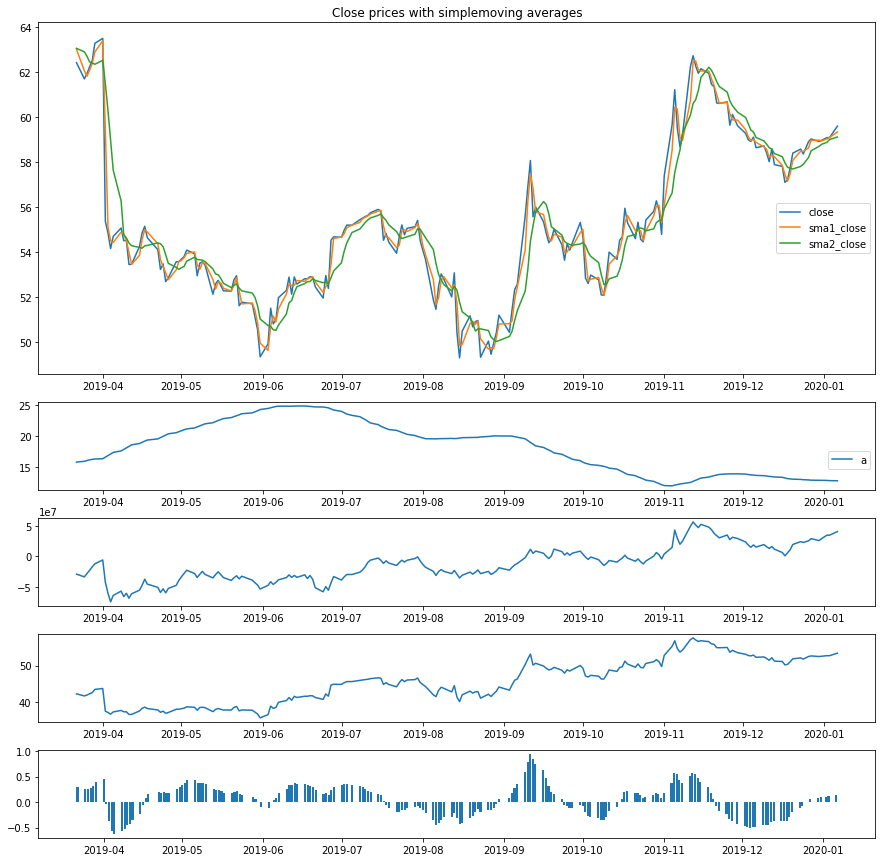

In [221]:
fig, (ax1, ax2,ax3,ax4, ax5) = plt.subplots(5, 1, figsize=(15,15), gridspec_kw={'height_ratios': [4,1,1,1,1]})

ax1.set_title('Close prices with simplemoving averages')

ax1.plot(x, y,)
ax1.legend(labels=('close','sma1_close','sma2_close'), loc='best', bbox_to_anchor=(1, 0.5))

ax2.plot(x, adx)
ax2.legend(labels=('adx'), loc='best', bbox_to_anchor=(1, 0.5))

ax3.plot(x, obv)

ax4.plot(x, rsi)

ax5.bar(x, macd)
# plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

In [15]:
y = wba_df['positions_close']
X = wba_df.drop(['positions_close', 'macd_hist'], axis=1)

logistic
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
X_train Score:  0.8197611292073833
(-----------------------)
X_test Score:   0.8340113913751017
Precision Score 0.8365357152480263
Confusion Matrix [[457 127]
 [ 77 568]]
auc 0.9205054688329617
(---------------------------------------)


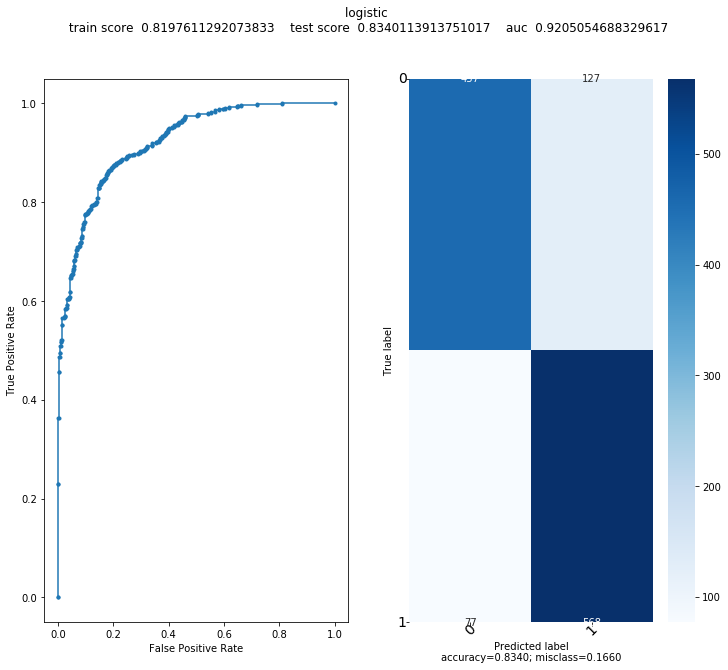

KNN
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
X_train Score:  0.8479913137893594
(-----------------------)
X_test Score:   0.7355573637103336
Precision Score 0.742688074777627
Confusion Matrix [[476 108]
 [217 428]]
auc 0.8171816926834448
(---------------------------------------)


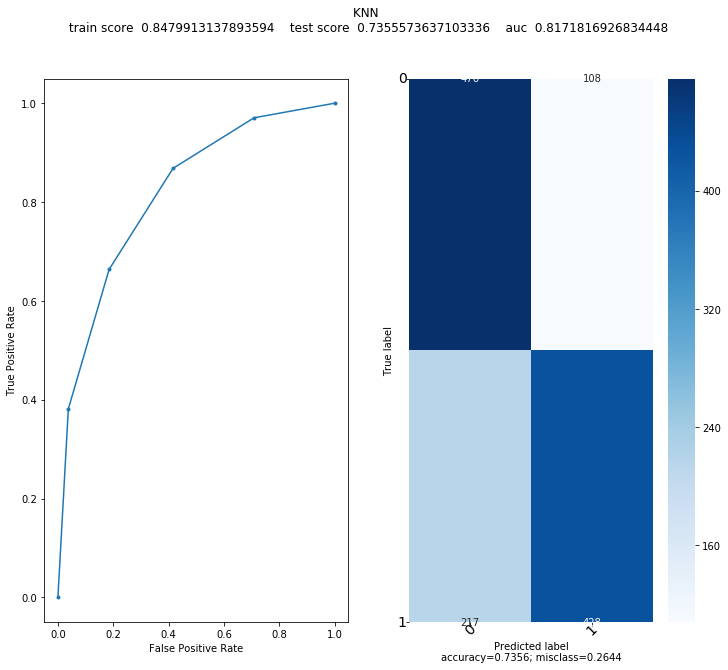

poly-SVM
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.8s
X_train Score:  0.7741585233441911
(-----------------------)
X_test Score:   0.7827502034174125
Precision Score 0.7842979880955587
Confusion Matrix [[426 158]
 [109 536]]
auc 0.8728602527344164
(---------------------------------------)


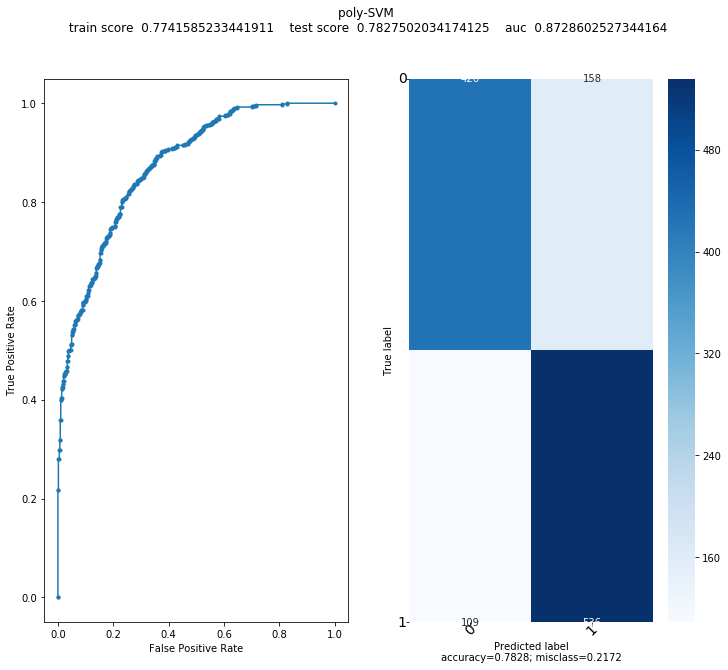

SVM
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   3.5s
X_train Score:  0.6104777415852335
(-----------------------)
X_test Score:   0.6257119609438568
Precision Score 0.6260336529141673
Confusion Matrix [[305 279]
 [181 464]]
auc 0.6636468620579803
(---------------------------------------)


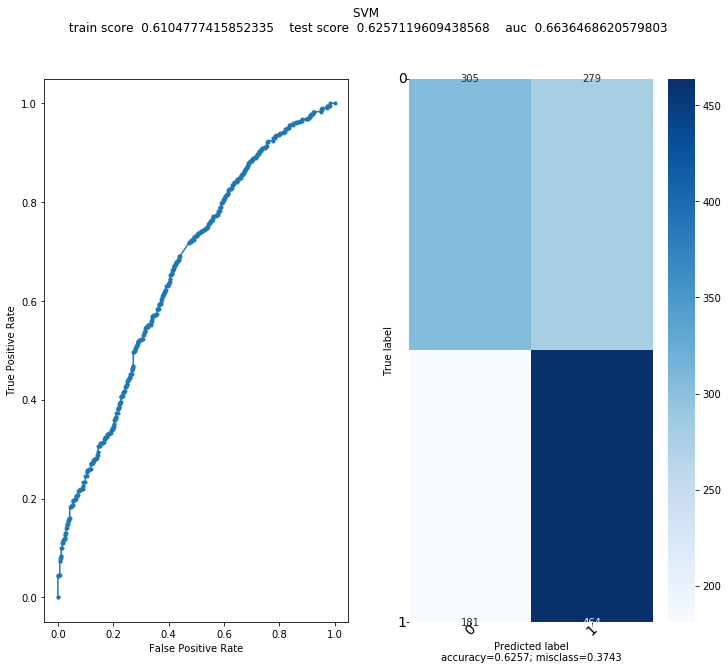

DecisionTree
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.2s
X_train Score:  0.8137893593919653
(-----------------------)
X_test Score:   0.6948738812042311
Precision Score 0.6982522796352584
Confusion Matrix [[437 147]
 [228 417]]
auc 0.7682515663162366
(---------------------------------------)


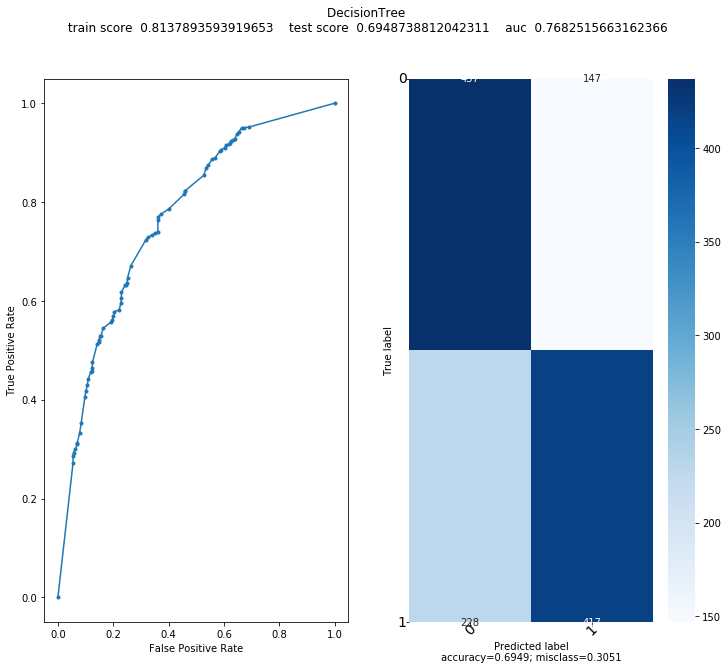

randomforest
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.4s
X_train Score:  0.7858306188925082
(-----------------------)
X_test Score:   0.7176566314076485
Precision Score 0.7193902803839982
Confusion Matrix [[376 208]
 [139 506]]
auc 0.7937851757459913
(---------------------------------------)


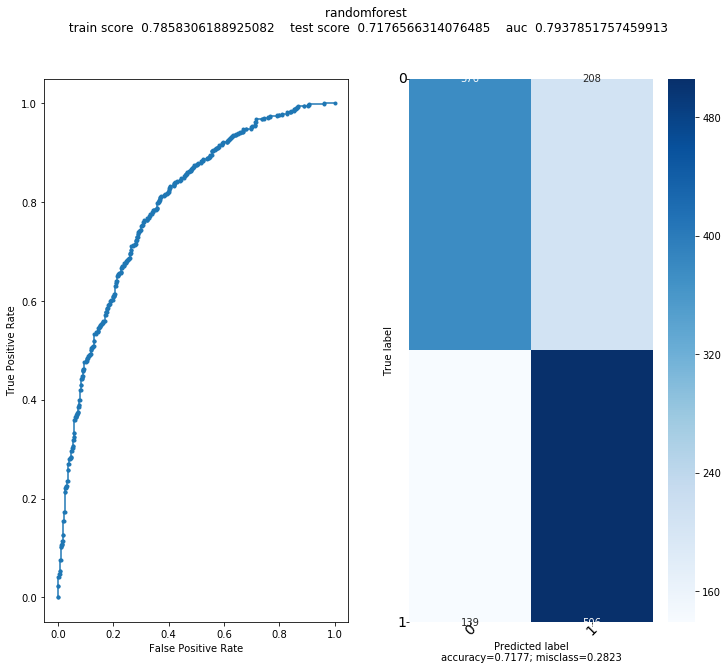

voting
(---------------------------------------)
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.4s
X_train Score:  0.8452768729641694
(-----------------------)
X_test Score:   0.8030919446704637
Precision Score 0.8031847065790948
Confusion Matrix [[452 132]
 [110 535]]
auc 0.88426250398216
(---------------------------------------)


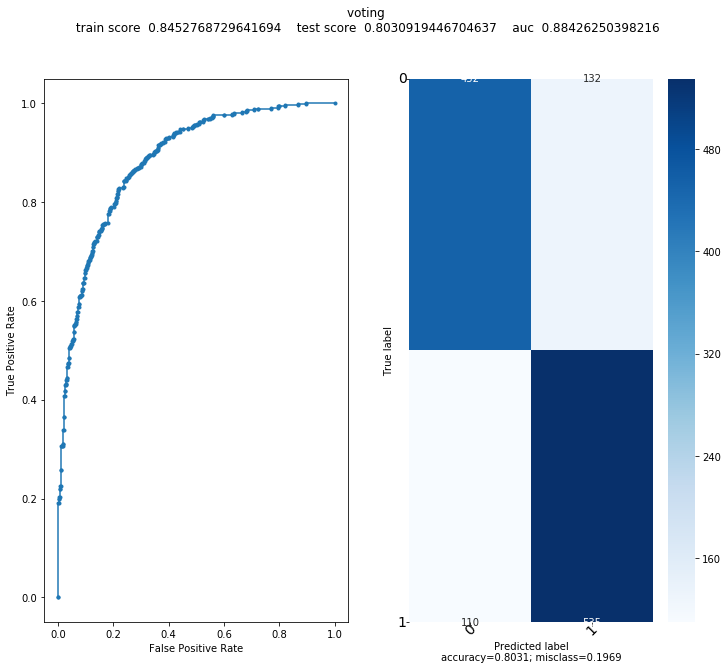

In [16]:
model_lst = ['logistic','KNN', 'poly-SVM', 'SVM', 'DecisionTree', 'randomforest', 'voting']
models = []
for model in model_lst:
    df = lf.model_pipe(x=X, y=y, model=model, scaler='minmax', cv_num=5, test_size=.25)
    models.append(df)
models_df = pd.concat(models)

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [18]:
result = adfuller(wba_df['close'])

In [19]:
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.546016545809029
p-value: 0.51063736563955
Critical Values:
	1%: -3.431688804614906
	5%: -2.8621316038585465
	10%: -2.567084911968541


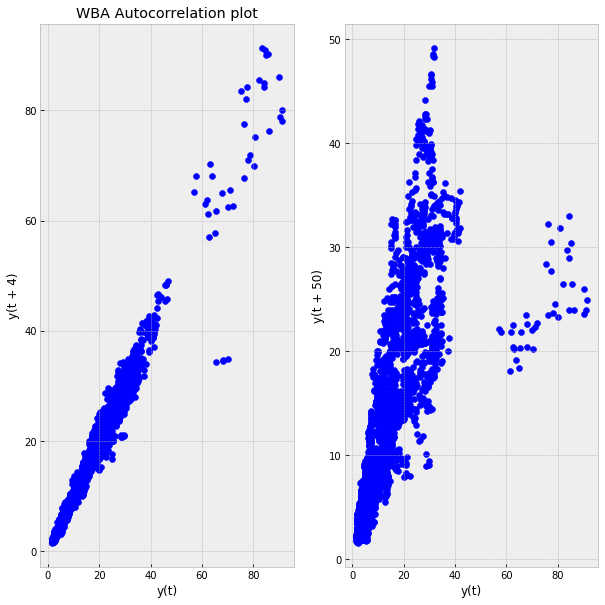

In [109]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
lag_plot(wba_df['close'], lag=4)
plt.title('WBA Autocorrelation plot')
plt.subplot(1,2,2)
lag_plot(wba_df['close'], lag=50)

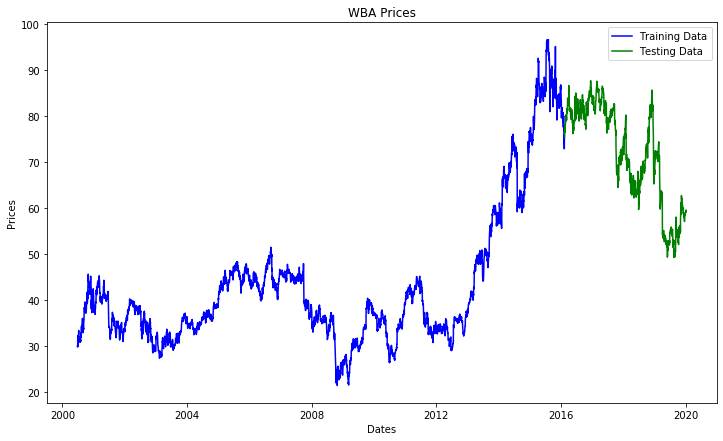

In [26]:
train_data, test_data = wba_df[0:int(len(wba_df)*0.8)], wba_df[int(len(wba_df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('WBA Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(train_data['close'], 'blue', label='Training Data')
plt.plot(test_data['close'], 'green', label='Testing Data')
# plt.xticks(np.arange(0,7982, 1300), wba_df.index[0:7982:1300])
plt.legend()


In [28]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +  np.abs(y_true))))

In [39]:
train_ar = train_data['close'].values
test_ar = test_data['close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1.079
Symmetric mean absolute percentage error: 17.411


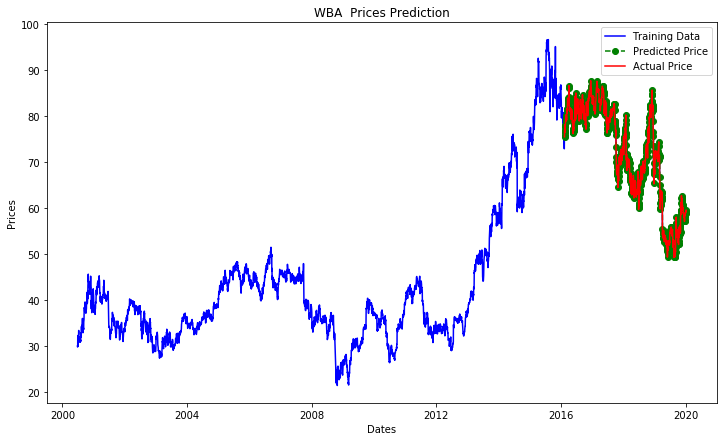

In [40]:
plt.figure(figsize=(12,7))
plt.plot(wba_df['close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.title('WBA  Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

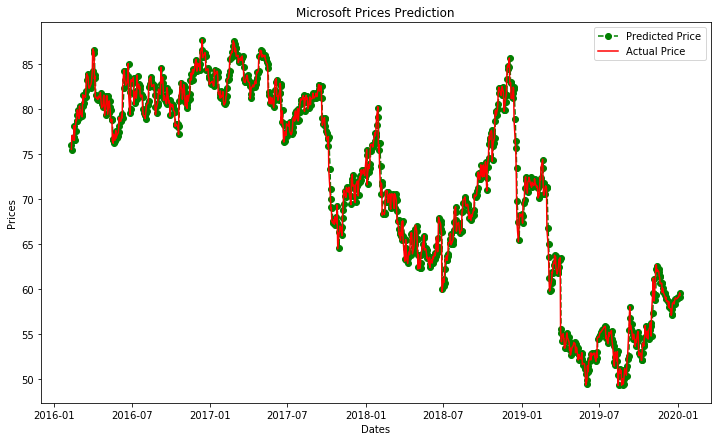

In [41]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['close'], color='red', label='Actual Price')
plt.legend()
plt.title('Microsoft Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
# plt.xticks(np.arange(6386,7982, 300), df['Date'][6386:7982:300])
plt.legend()

In [42]:
print(model_fit.summary())

ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 4911
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -6063.808
Method:                       css-mle   S.D. of innovations              0.832
Date:                Wed, 08 Jan 2020   AIC                          12143.617
Time:                        13:47:50   BIC                          12195.611
Sample:                             1   HQIC                         12161.857
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.011      0.534      0.593      -0.016       0.028
ar.L1.D.y     -0.3080      0.690     -0.446      0.655      -1.661       1.045
ar.L2.D.y     -0.0420      0.019     -2.266      0.023      -0.078      -0.006
ar

In [43]:
print('predicted=%f, expected=%f' % (yhat, obs))

predicted=59.585042, expected=59.290000


In [44]:
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsaplots

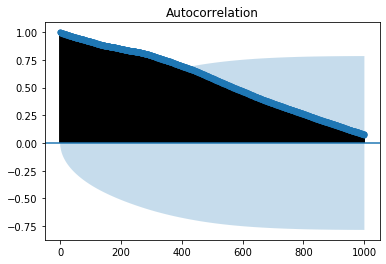

In [65]:
tsaplots.plot_acf(wba_df.close, lags=1000);

In [74]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return


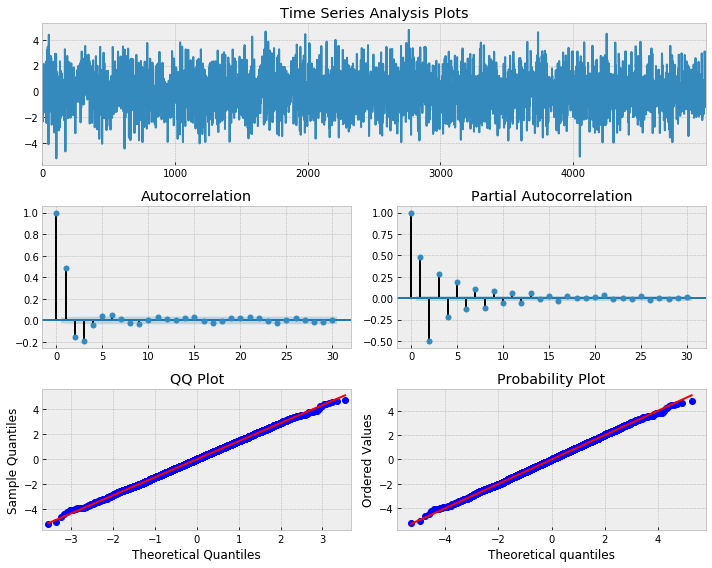

In [78]:
import statsmodels.tsa.api as smt
import scipy.stats as scs
# Simulate an ARMA(2, 2) model with alphas=[0.5,-0.25] and betas=[0.5,-0.3]
max_lag = 30

n = int(5000) # lots of samples to help estimates
burn = int(n/10) # number of samples to discard before fit

alphas = np.array([0.5, -0.25])
betas = np.array([0.5, -0.3])
ar = np.r_[1, -alphas]
ma = np.r_[1, betas]

arma22 = smt.arma_generate_sample(ar=ar, ma=ma, nsample=n, burnin=burn)
_ = tsplot(arma22, lags=max_lag)

ecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWar

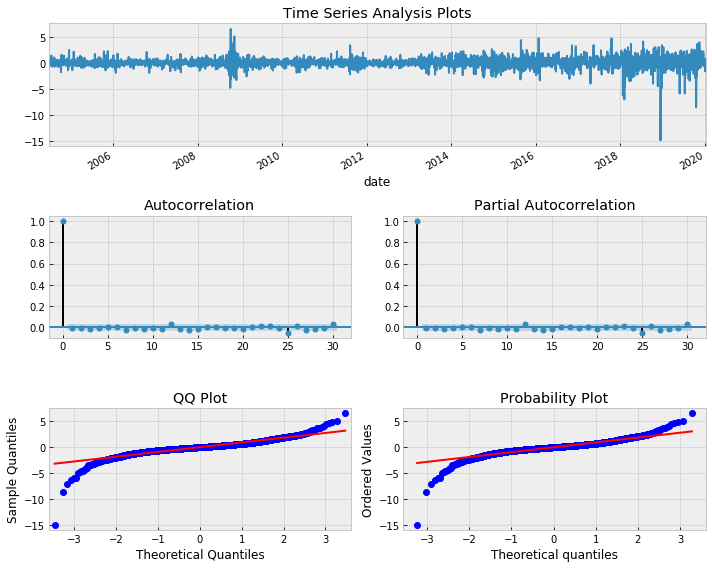

In [139]:
best_aic = np.inf 
best_order = None
best_mdl = None

p_rng = range(5) # [0,1,2,3]
q_rng = range(5)
d_rng = range(2) # [0,1]
for i in p_rng:
    for d in d_rng:
        for j in q_rng:
            try:
                tmp_mdl = smt.ARIMA(wba_df['close'].iloc[1000:], 
                                    order=(i,d,j)).fit(method='mle',
                                    trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: %6.2f | order: %s'%(best_aic, best_order))

# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

In [140]:
print(best_mdl.summary())

ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 3913
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -5188.495
Method:                           mle   S.D. of innovations              0.911
Date:                Wed, 08 Jan 2020   AIC                          10386.990
Time:                        22:06:22   BIC                          10418.350
Sample:                             1   HQIC                         10398.119
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.close    -1.0398      0.130     -8.029      0.000      -1.294      -0.786
ar.L2.D.close    -0.5279      0.111     -4.759      0.000      -0.745      -0.311
ma.L1.D.close     1.0143      0.136      7.449      0.000       0.747

In [141]:

from statsmodels.stats.stattools import jarque_bera
import statsmodels.stats as sms

score, pvalue, _, _ = jarque_bera(best_mdl.resid)

if pvalue < 0.10:
    print('We have reason to suspect the residuals are not normally distributed.')
else:
    print('The residuals seem normally distributed.')

sms.diagnostic.acorr_ljungbox(best_mdl.resid, lags=[20], boxpierce=False)


We have reason to suspect the residuals are not normally distributed.


(array([13.8865796]), array([0.83619972]))

In [142]:
n_steps = 21

f, err95, ci95 = best_mdl.forecast(steps=n_steps) # 95% CI
_, err99, ci99 = best_mdl.forecast(steps=n_steps, alpha=0.01) # 99% CI

idx = pd.date_range(wba_df.index[-1], periods=n_steps, freq='D')
fc_95 = pd.DataFrame(np.column_stack([f, ci95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([ci99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all.head()

forecast  lower_ci_95  lower_ci_99  upper_ci_95  upper_ci_99
2020-01-08  144.984323   143.198379   142.637194   146.770267   147.331451
2020-01-09  145.015222   142.521581   141.738022   147.508864   148.292423
2020-01-10  144.970251   141.980438   141.040970   147.960065   148.899532
2020-01-11  145.000701   141.527249   140.435812   148.474152   149.565589
2020-01-12  144.992780   141.128832   139.914691   148.856729   150.070869

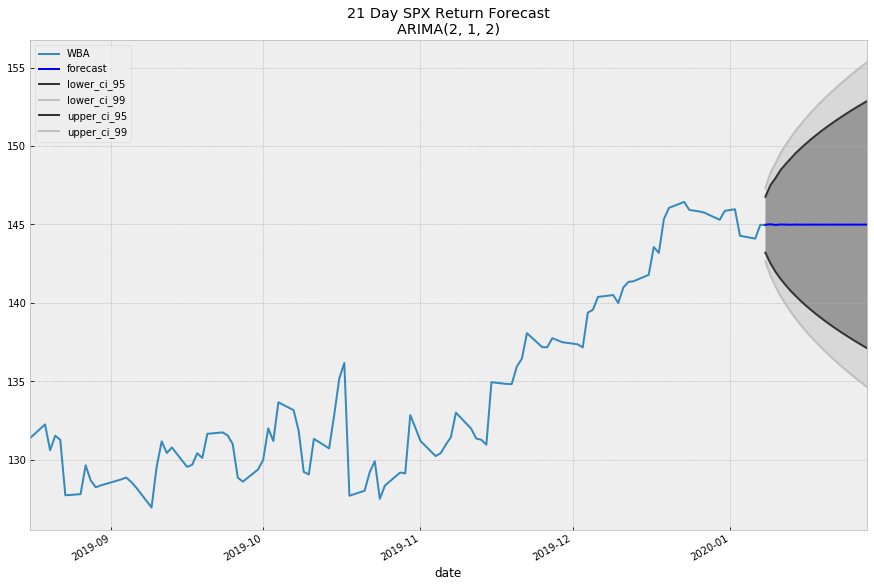

In [143]:
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))
ax = plt.gca()

ts = wba_df['close'].iloc[-100:].copy()
ts.plot(ax=ax, label='WBA')
# in sample prediction
#pred = best_mdl.predict(ts.index[0], ts.index[-1])
#pred.plot(ax=ax, style='r-', label='In-sample prediction')

styles = ['b-', '0.2', '0.75', '0.2', '0.75']
fc_all.plot(ax=ax, style=styles)
plt.fill_between(fc_all.index, fc_all.lower_ci_95, fc_all.upper_ci_95, color='gray', alpha=0.7)
plt.fill_between(fc_all.index, fc_all.lower_ci_99, fc_all.upper_ci_99, color='gray', alpha=0.2)
plt.title('{} Day SPX Return Forecast\nARIMA{}'.format(n_steps, best_order))
plt.legend(loc='best', fontsize=10)

In [144]:
def RMSEfromResid(X):
    summ = 0
    for i in X:
        summ+=i**2
    return((summ/len(X))**0.5)

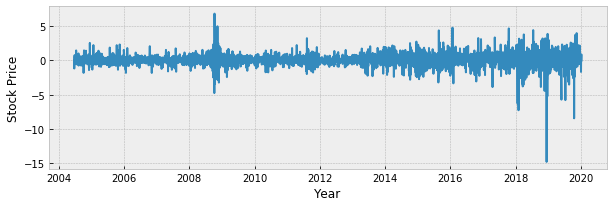

In [148]:
plt.figure(figsize=(10,3))
plt.plot(wba_df.index[1000:len(wba_df.index)-1], wba_df['close'][1000:].diff().dropna())
plt.ylabel('Stock Price')
plt.xlabel('Year')
plt.show()

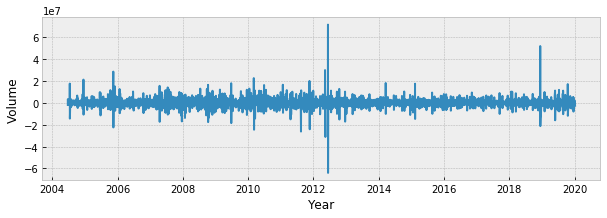

In [149]:
plt.figure(figsize=(10,3))
plt.plot(wba_df.index[1000:len(wba_df.index)-1], wba_df['volume'][1000:].diff().dropna())
plt.ylabel('Volume')
plt.xlabel('Year')
plt.show()

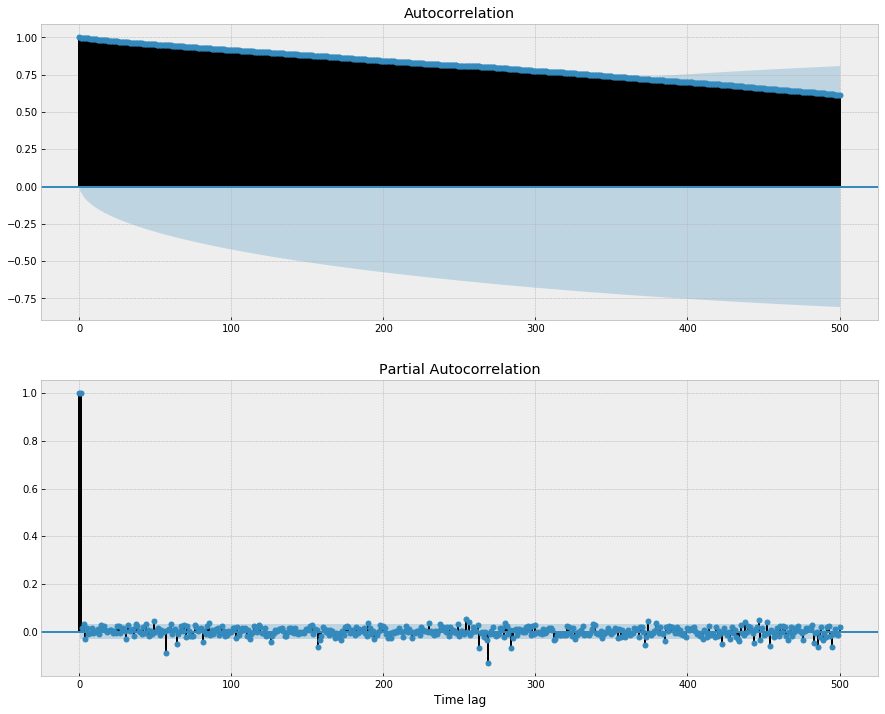

In [161]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( wba_df['close'][1000:], lags=500, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf( wba_df['close'][1000:], lags=500, ax=ax2)
plt.xlabel('Time lag')
plt.show()

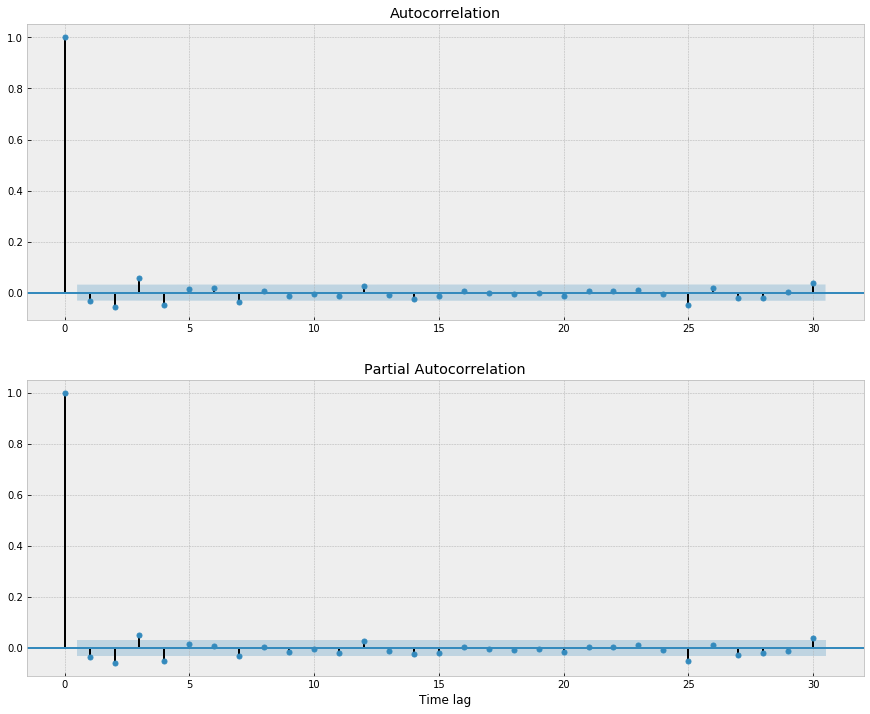

In [160]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf( wba_df['close'][1000:].diff().dropna(), lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf( wba_df['close'][1000:].diff().dropna(), lags=30, ax=ax2)
plt.xlabel('Time lag')
plt.show()

In [171]:
#Cross Correlation between differenced closing price and differenced volume
close_price = wba_df['close'][1000:].get_values()
xaxis = [x for x in range(-30,31)]
y_up = [(2/(len(close_price)**0.5)) for i in range(-30,31)]
y_down = [(-2/(len(close_price)**0.5)) for i in range(-30,31)]
close_diff = wba_df['close'][1000:].diff().dropna().get_values()
vol_diff =  wba_df['volume'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15, 10)
plt.xcorr(close_diff, vol_diff, usevlines=True, maxlags=30, normed=True, lw=3)
plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and Volume After First Differencing')
plt.show()

SyntaxError: invalid syntax (<ipython-input-171-477ab450b13b>, line 10)

/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


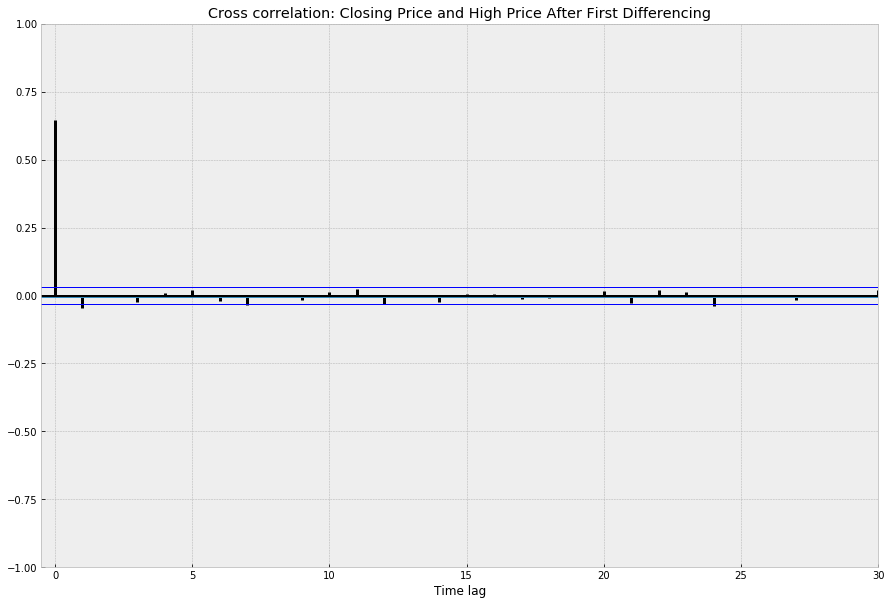

In [170]:
#Cross Correlation between differenced closing price and differenced high price 
high_diff =  wba_df['high'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15,10))

plt.xcorr(close_diff, high_diff,usevlines=True, maxlags=30, normed=True, lw=3)

plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and High Price After First Differencing')
plt.show()

/Users/fadisarraf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


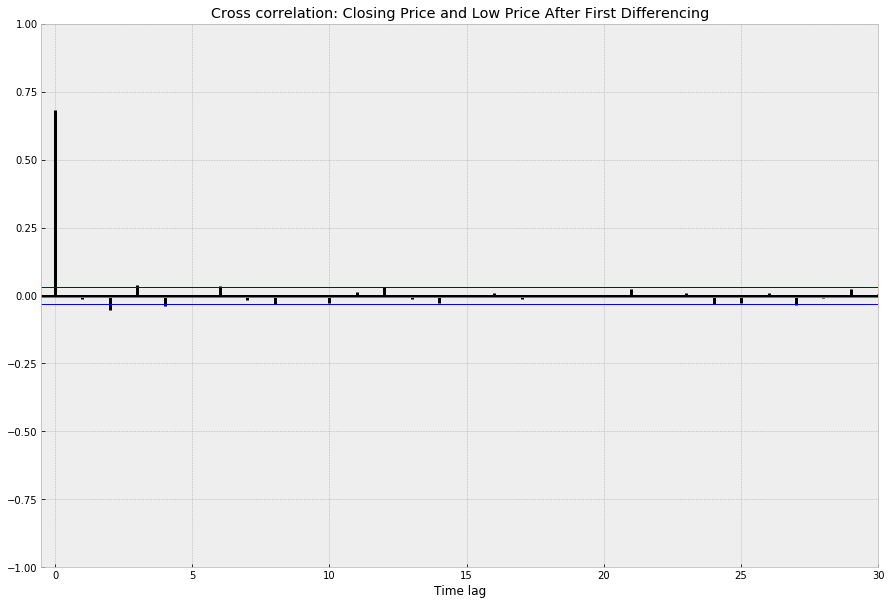

In [168]:
#Cross Correlation between differenced closing price and differenced low price
low_diff =  wba_df['low'][1000:].diff().dropna().get_values()

fig = plt.figure(figsize=(15,10))

plt.xcorr(close_diff,low_diff,usevlines=True, maxlags=30, normed=True, lw=3)

plt.ylim(-1, 1)
plt.xlim(-0.5, 30)
plt.axhline(0, color='black', lw=2)
plt.plot(xaxis, y_up, color='blue', lw=1)
plt.plot(xaxis, y_down, color='blue', lw=1)
plt.xlabel('Time lag')
plt.title('Cross correlation: Closing Price and Low Price After First Differencing')
plt.show()

In [186]:

from statsmodels.tsa.arima_model import ARIMAResults 
date = wba_df.index[1000:]
X = wba_df['close'][1000:].get_values()
size = int(len(X)*0.80)
train, test = X[0:size], X[size:len(X)]
date_test = date[size:]
def evaluate_arima_model(X, model_order):
    model_arima = ARIMA(X, order=model_order).fit(disp=0)
    AIC = ARIMAResults.aic(model_arima)
    BIC = ARIMAResults.bic(model_arima)
    LLF = model_arima.llf
    RMSE = RMSEfromResid(model_arima.resid)
    return([AIC, BIC, LLF, RMSE])

# import warnings
# warnings.filterwarnings("ignore")
# evaluate combinations of p, d and q values for an ARIMA model
p_values = [0,1,2,3,4]
d_values = [1]
q_values = [0,1,2,3]
data = []
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            # try:
            [AIC, BIC, LLF, RMSE] = evaluate_arima_model(train, order)
            print(order)
            data.append([order,AIC, BIC, LLF, RMSE])
            # except:
            #     continue

ARIMA_Models = pd.DataFrame(data,columns=['ARIMA', 'AIC', 'BIC', 'Maximum Log-Likelihood', 'RMSE'],dtype=float)

(0, 1, 0)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(1, 1, 0)
(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(2, 1, 0)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(3, 1, 0)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(4, 1, 0)
(4, 1, 1)
(4, 1, 2)
(4, 1, 3)


In [188]:
ARIMA_Models.sort_values(by='RMSE' )


ARIMA          AIC          BIC  Maximum Log-Likelihood      RMSE
19  (4, 1, 3)  6875.798049  6930.237144            -3428.899025  0.723649
18  (4, 1, 2)  6874.123528  6922.513834            -3429.061764  0.723687
15  (3, 1, 3)  6874.155969  6922.546276            -3429.077985  0.723691
14  (3, 1, 2)  6872.543637  6914.885155            -3429.271819  0.723736
11  (2, 1, 3)  6874.029545  6916.371063            -3430.014773  0.723908
10  (2, 1, 2)  6884.809573  6921.102302            -3436.404786  0.725390
17  (4, 1, 1)  6887.612112  6929.953630            -3436.806056  0.725483
16  (4, 1, 0)  6885.698246  6921.990976            -3436.849123  0.725493
13  (3, 1, 1)  6886.192890  6922.485620            -3437.096445  0.725550
7   (1, 1, 3)  6887.569422  6923.862152            -3437.784711  0.725710
12  (3, 1, 0)  6886.695407  6916.939348            -3438.347703  0.725840
9   (2, 1, 1)  6886.802496  6917.046438            -3438.401248  0.725853
3   (0, 1, 3)  6887.712904  6917.956846            -3438.856452  0.725958
6   (1, 1, 2)  6889.364105  6919.608046            -3439.682053  0.726150
8   (2, 1, 0)  6894.243428  6918.438582            -3443.121714  0.726948
2   (0, 1, 2)  6896.164476  6920.359629            -3444.082238  0.727171
5   (1, 1, 1)  6899.772944  6923.968097            -3445.886472  0.727590
1   (0, 1, 1)  6900.126767  6918.273132            -3447.063384  0.727864
4   (1, 1, 0)  6901.649938  6919.796303            -3447.824969  0.728041
0   (0, 1, 0)  6913.932349  6926.029926            -3454.966175  0.729705

In [189]:
history = [x for x in train]
predictions = list()
data=list()
#len_test = len(test)
len_test= len(test)
for t in range(len_test):
    model_arima = ARIMA(endog = history, order=(4, 1, 3)).fit(disp=0)
    output = model_arima.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    data.append([date_test[t], obs, yhat])
    
RMSE = (mean_squared_error(test, predictions))**0.5
arima_results = pd.DataFrame(data,columns=['Period','Actual Price', 'Predicted Price'],dtype=float)
print('Test RMSE: %.3f' % RMSE)
# plot
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(date_test, test, color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test, predictions, color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arima_pred = predictions
arima_RMSE = RMSE

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

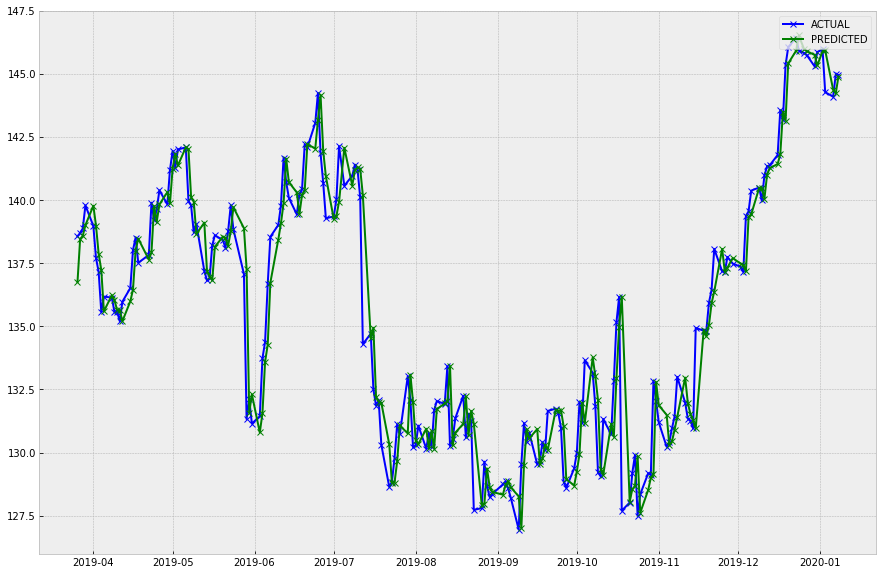

In [178]:
plt.rcParams['figure.figsize'] = (15,10)
plt.plot(date_test[-200:], test[-200:], color='Blue', label='ACTUAL', marker='x')
plt.plot(date_test[-200:], predictions[-200:], color='green', label='PREDICTED', marker='x')
plt.legend(loc='upper right')
plt.show()
arima_pred = predictions
arima_RMSE = RMSE